

---


**MACHINE LEARNING- ENSEMBLE LEARNING**

**SUBMISSION BY - ALAISSA SHAIKH**

---



In [ ]:
pip install scikit-learn xgboost catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.4 MB/s eta 0:00:00


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#importing dataset
data = pd.read_csv('/content/fraudTest.csv')

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
#selecting relevant features
features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long', 'category', 'gender', 'state']
target = 'is_fraud'
X = data[features]
y = data[target]

In [ ]:
#encoding categorical variables
label_encoders = {}
for column in ['category', 'gender', 'state']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

<ipython-input-7-ac956a43161f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-7-ac956a43161f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-7-ac956a43161f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **GRADIENT BOOSTING MACHINES (GBM)**

 *   Used for classification and regression tasks

 *   Builds multiple decision trees sequentially, where each tree corrects the errors of the previous one.

 *   Combines the predictions of multiple weak learners (typically decision trees) to produce a strong learner.


---


**How GBM works?**

1.   Building Trees Sequentially

1.   Gradient Descent Optimization: uses gradient descent optimization to minimize this loss function.

1.   Adding Trees: GBM calculates the gradient of the loss function then fits a new tree to the gradient values, seeking to reduce the loss.

1.   Ensemble of Trees: The final prediction is made by combining the predictions of all the trees in the ensemble.

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)

### **EXTREME GRADIENT BOOSTING (XGBoost)**

*   Optimized and efficient implementation of gradient boosting designed for speed and performance.
*   Used for a variety of supervised learning tasks, including classification, regression, and ranking problems.


---


**How XGBoost works?**

1.   Gradient Boosting Framework

1.   Regularization: XGBoost incorporates L1 and L2 regularization terms into the objective function to prevent overfitting.

1.   Tree Pruning: To remove splits that have minimal impact on improving the objective function. Pruning helps prevent overfitting and reduces the computational cost of training.


In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'multi:softmax',
    'num_class': 2,
    'learning_rate': 0.1,
    'max_depth': 3,
    'eval_metric': 'mlogloss'
}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = xgb_model.predict(dtest)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

### **STACKING**

*   Combines multiple base models to improve predictive performance.

**How stacking works?**


---


1.   Base Models: Selection of base models (decision trees, support vector machines, neural networks, or gradient boosting machines).

1.   Training Phase: Dataset is split into multiple subsets. Each base model is trained on a different subset of the data. The predictions made by each base model on the remaining subset are recorded.

1.   Meta-Model: Meta-model is trained using the predictions as features. (Common meta-models include linear regression, logistic regression, or another machine learning algorithm).

1.   Prediction Phase: Base models are used to make predictions on new, unseen data. These predictions are then fed into the trained meta-model, which generates the final prediction.

In [ ]:
estimators = [
    ('gbm', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)
stack_accuracy = accuracy_score(y_test, y_pred_stack)



---


### **ACCURACY COMPARISON**


In [ ]:
accuracies = [gbm_accuracy, xgb_accuracy, stack_accuracy]
models = ['GBM', 'XGBoost', 'Stacking']

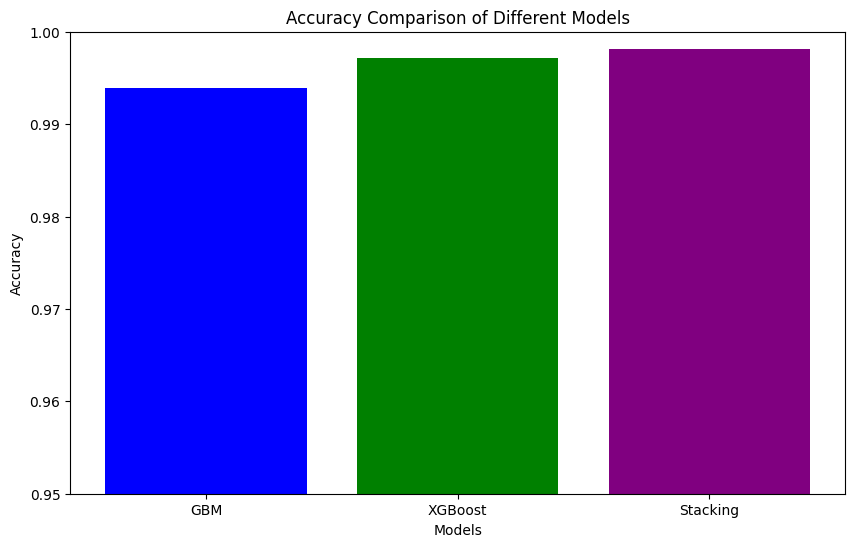

In [ ]:
#plotting accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.95, 1.0)
plt.show()

In [ ]:
#printing accuracies
gbm_accuracy, xgb_accuracy, stack_accuracy

(0.9938998056575253, 0.997180834472996, 0.9981825379687612)